In [1]:
%load_ext autoreload
%autoreload 2



In [7]:
import context

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
import statistics
import numpy as np


import logging.config
logging.config.fileConfig('../logging.ini', disable_existing_loggers=False)

CAT_PATH = r'D:\Datasets\enwiki-20190601-category.sql'
PAGE_PATH = r'D:\Datasets\enwiki-20190601-page.sql'
LINKS_PATH = r'D:\Datasets\enwiki-20190601-categorylinks.sql'


In [3]:
from cat2vec.graph.raw_dump_loader import load_graph
graph = load_graph(CAT_PATH, PAGE_PATH, LINKS_PATH)



2019-06-07 19:45:26,973 - cat2vec.graph.raw_dump_loader - INFO - Loading graph from raw dump: D:\Datasets\enwiki-20190601-category.sql, D:\Datasets\enwiki-20190601-page.sql, D:\Datasets\enwiki-20190601-categorylinks.sql
2019-06-07 19:45:26,974 - cat2vec.graph.raw_dump_loader - INFO - Parsing categories.sql
2019-06-07 19:45:38,020 - cat2vec.graph.raw_dump_loader - INFO - Categories.sql parsed
2019-06-07 19:45:38,021 - cat2vec.graph.raw_dump_loader - INFO - Parsing page.sql
2019-06-07 19:46:59,099 - cat2vec.graph.raw_dump_loader - INFO - page.sql parsed
2019-06-07 19:46:59,141 - cat2vec.graph.raw_dump_loader - INFO - Parsing categorylinks.sql
2019-06-07 19:49:27,904 - cat2vec.graph.raw_dump_loader - INFO - categorylinks.sql parsed. Total links loaded: 5522074


In [4]:
# nodes (categories), edges, articles
print('Number of nodes: ', len(graph.nodes))

edges_count = reduce(lambda x, y: x+y, map(lambda n: len(n.children), graph.nodes.values()), 0)
print('Edges count: ' + str(edges_count))





Number of nodes:  1820279
Edges count: 5478020


In [14]:
sub_categories = list(map(lambda n: len(n.children), graph.nodes.values()))
print('Statistic for subcategories per node:')
print('\tmean:', statistics.mean(sub_categories))
print('\tmedian:', statistics.median(sub_categories))
print('\t(population)std_dev:', statistics.pstdev(sub_categories))
print('\t99th percentile: ', np.percentile(sub_categories, 99))



Statistic for subcategories per node:
	mean: 3.0094397617068593
	median: 3
	(population)std_dev: 1.686753986958985
	99th percentile:  8.0


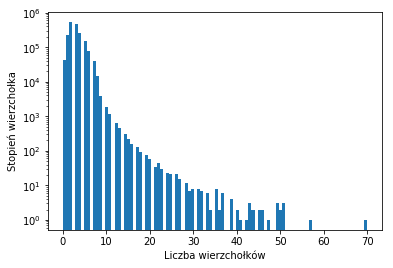

In [13]:
plt.hist(sub_categories, log = True, bins=100)
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Stopień wierzchołka')
plt.savefig('full_nodes_degrees_dist.png')
plt.show()



In [11]:
# Nodes articles statistics
articles = list(map(lambda n: n.number_of_articles, graph.nodes.values()))
print('Statistic for subcategories per node:')
print('\tmean:', statistics.mean(articles))
print('\tmedian:', statistics.median(articles))
print('\t(population)std_dev:', statistics.pstdev(articles))



Statistic for subcategories per node:
	mean: 72.825929431697
	median: 5
	(population)std_dev: 4111.787204876349


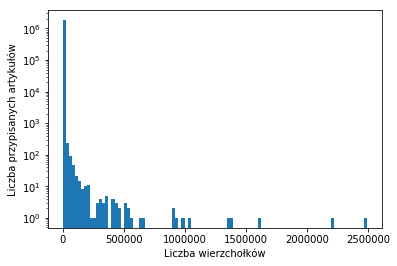

In [16]:
# visualization
plt.hist(articles, log = True, bins=100)
plt.xlabel('Liczba wierzchołków')
plt.ylabel('Liczba przypisanych artykułów')
plt.savefig('full_articles_assignment_dist.png')
plt.show()
